<a href="https://colab.research.google.com/github/LauraAlejandraFuentesArevalo/DS_Laura_Alejandra_Fuentes/blob/main/Clase9Oct10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estadística Descriptiva** 

In [ ]:
#librerias para graficar
import sys
import numpy as np
import pandas as pd
# Librería para medidas de posición y forma
import scipy
import scipy.stats as stats
# Librerías para visualización
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

print('** Versiones Actuales | Requeridas **')
print('NumPy: Version Actual:', np.__version__)
print('Pandas: Version Actual:', pd.__version__)


** Versiones Actuales | Requeridas **
NumPy: Version Actual: 1.21.6
Pandas: Version Actual: 1.3.5


In [ ]:
ruta = "//content/drive/MyDrive/Colab Notebooks/data_set/Clase_Oct5.csv"
df = pd.read_csv(filepath_or_buffer=ruta)
df1=df
dfarreglada=df1.fillna(0)
dfarreglada.head(100)

,countrycode,country,year,rgdpo,pop,emp,avh,hc
0,ABW,Aruba,1950,0.00000,0.000000,0.000000,0.0,0.000000
1,ABW,Aruba,1951,0.00000,0.000000,0.000000,0.0,0.000000
2,ABW,Aruba,1952,0.00000,0.000000,0.000000,0.0,0.000000
3,ABW,Aruba,1953,0.00000,0.000000,0.000000,0.0,0.000000
4,ABW,Aruba,1954,0.00000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...
95,AGO,Angola,1977,27101.01953,8.130988,4.111429,0.0,1.033385
96,AGO,Angola,1978,24654.34766,8.376147,4.209530,0.0,1.035939
97,AGO,Angola,1979,24989.89453,8.641521,4.290003,0.0,1.038498
98,AGO,Angola,1980,25335.56836,8.929900,4.300710,0.0,1.041064


Desviación estándar (ddof=0)
Desviación estándar (ddof=1)

In [ ]:
hc=df["hc"]
print("Desviación estándar de la población (con 0 grados de libertad): ",hc.std(ddof=0))

print("La varianza de la población (con 0 grados de libertad): ",hc.var(ddof=0))


Desviación estándar de la población (con 0 grados de libertad):  0.7207301419533889
La varianza de la población (con 0 grados de libertad):  0.5194519375201521


In [ ]:
hc=df["hc"]
#La población la divide entre n o (n-1) --> Hay un dato que probablemente yo lo eliminaré porque no va acorde a los otros datos. 
print("Desviación estándar de la población (con 1 grado de libertad): ",hc.std(ddof=1))

print("La varianza de la población (con 1 grado de libertad): ",hc.var(ddof=1))

Desviación estándar de la población (con 1 grado de libertad):  0.7207735685880773
La varianza de la población (con 1 grado de libertad):  0.5195145371751918


In [ ]:
print("el ingreso máximo es de ",hc.max())

el ingreso máximo es de  3.974208117


In [ ]:
np.arrange(start=0.1,stop=1,step=0.1)

AttributeError: ignored

In [ ]:
df1.describe()

,year,rgdpo,pop,emp,avh,hc
count,12376.000000,9.985000e+03,9985.000000,8841.000000,3373.000000,8299.000000
mean,1983.500000,2.691928e+05,30.736765,14.799485,1984.099941,2.064241
std,19.628579,1.070178e+06,114.569825,59.107713,272.879958,0.720774
min,1950.000000,1.977999e+01,0.004376,0.001180,1353.886841,1.007038
25%,1966.750000,6.380658e+03,1.634517,0.940000,1799.336060,1.431531
50%,1983.500000,2.710632e+04,6.115370,3.021000,1972.072876,1.954407
75%,2000.250000,1.374726e+05,19.891548,8.583438,2149.860352,2.649120
max,2017.000000,1.838384e+07,1409.517456,792.575317,2910.734863,3.974208


In [ ]:
hc.quantile(0.2)
hc.quantile(0.4)
hc.quantile(0.6)
hc.quantile(0.8)
hc.quantile(np.arrange(0.1,1,0.1))

AttributeError: ignored

In [ ]:
df1["pop"].quantile(np.arrange(0.1,1,0.1))

AttributeError: ignored

In [ ]:
df1["pop"].quantile(np.arrange(0.9,1.01,0.01))

AttributeError: ignored

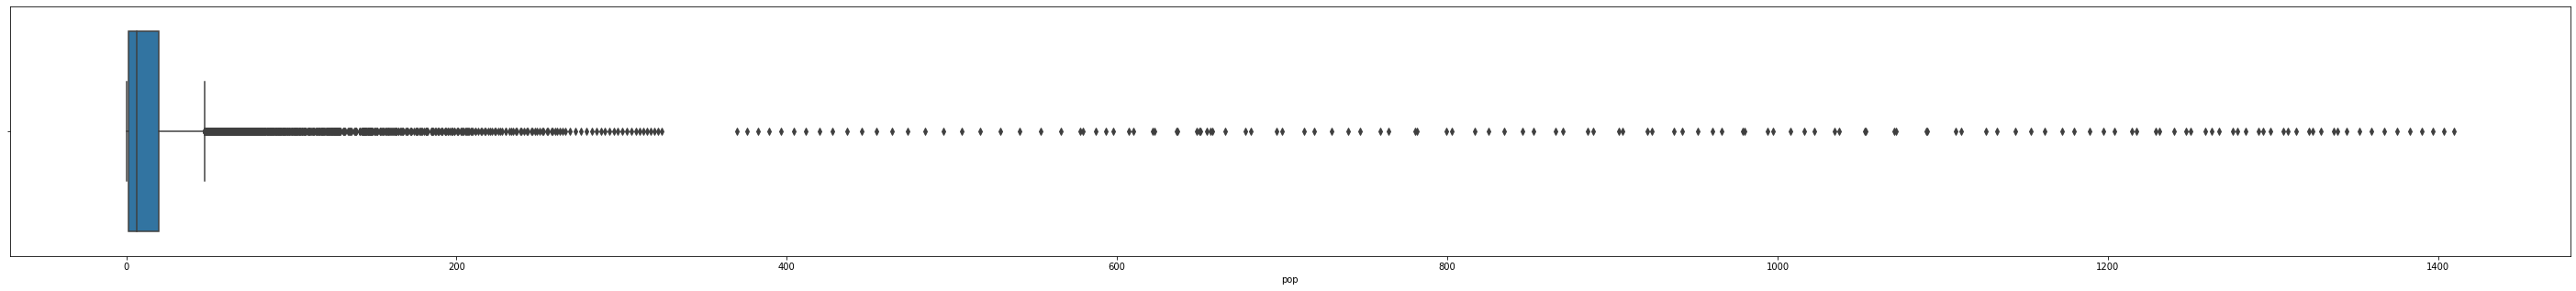

In [ ]:
fig, ax=plt.subplots(figsize=(50,5))
sns.boxplot(data=df,x="pop")

In [ ]:
pop=df["pop"]
Q1=pop.quantile(0.25)
Q3=pop.quantile(0.75)
print("Q1= ",Q1)
print("Q2= ",Q3)

Q1=  1.634516954
Q2=  19.89154816


In [ ]:
IQR=Q3-Q1
print("IQR = ", IQR)

IQR =  18.257031206


In [ ]:
print("El limite inferior =",Q1-(1.5*IQR))
print("El limite superior =", Q3+(1.5*IQR))

El limite inferior = -25.751029855000002
El limite superior = 47.277094969000004


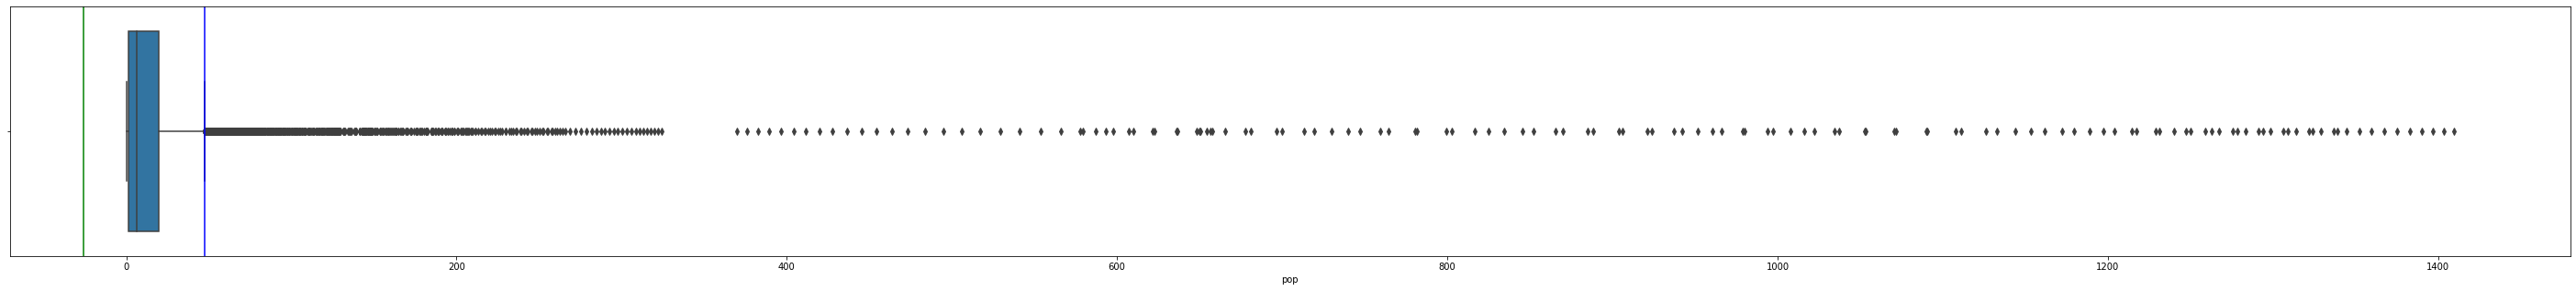

In [ ]:
fig, ax=plt.subplots(figsize=(50,5))
sns.boxplot(data=df,x="pop")
plt.axvline(Q3+(1.5*IQR), color="blue",label="Lim. Superior")
plt.axvline(Q1-(1.5*IQR), color="green",label="Lim. Inferior")

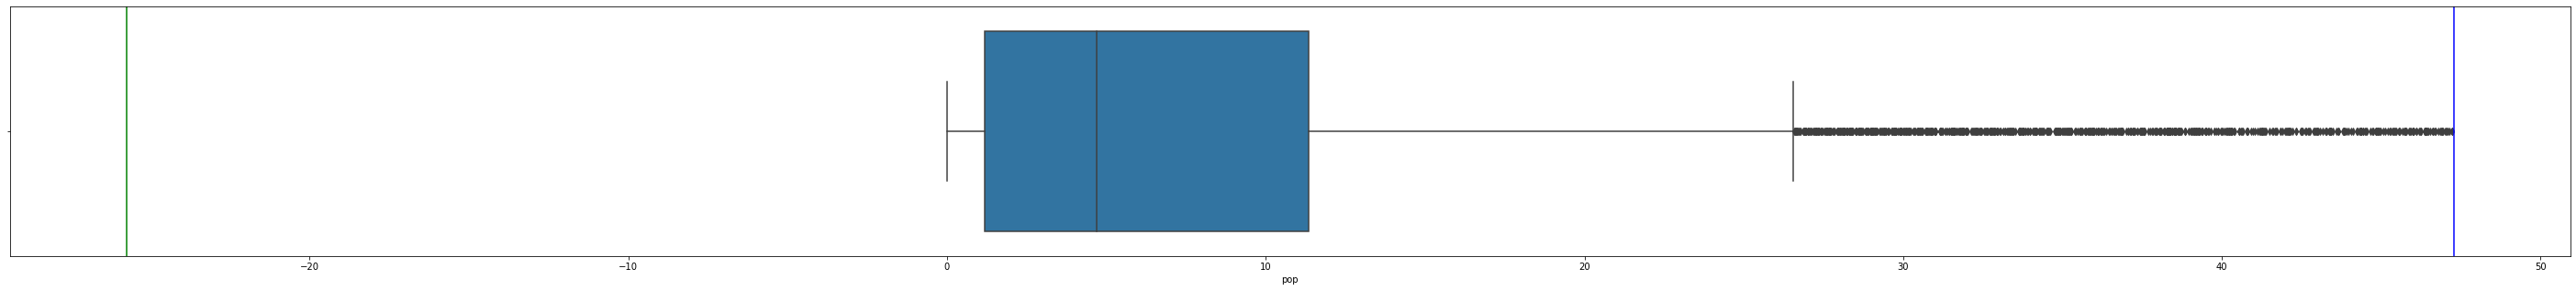

In [ ]:
df_filtro=df[  (df["pop"]>=Q1-(1.5*IQR)) &  (df["pop"]<=Q3+(1.5*IQR) )]

fig, ax=plt.subplots(figsize=(50,5))
sns.boxplot(data=df_filtro,x="pop")
plt.axvline(Q3+(1.5*IQR), color="blue",label="Lim. Superior")
plt.axvline(Q1-(1.5*IQR), color="green",label="Lim. Inferior")

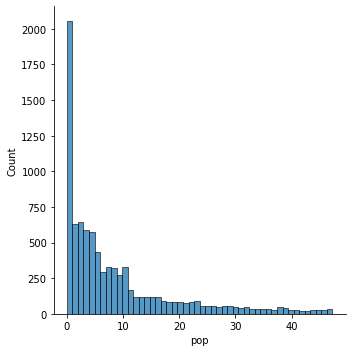

In [ ]:
sns.displot(df_filtro["pop"])
#La grafica se ve asimétrica. 

In [ ]:
print("El coeficiente de asimetria= ",df_filtro["pop"].skew())
#Será más distribuciónnormal, es dedcir, serpa mejor entre mas cercano a 0
#Si es positivo, la gradica está acostada a la derecha
#Si es negativo, la gradica está acostada a la izquierda

El coeficiente de asimetria. Entre mas cercano a 0, mejor  1.684036534165699


In [ ]:
#Coeficiente de curtosis
print("El coeficiente de curtosis= ",df_filtro["pop"].kurtosis())
#Lo ideal es que tienda a ser 0. En absoluto 0 indicaría que todos los datos están llendo al mismo dato. 
#Un numero bajito implica que el grosor de los datos bajo la linea de tendencia no es mucho. 

El coeficiente de curtosis=  2.2774181301627023


In [ ]:
data=np.random.normal(0,1,50000)
print("mean ", np.mean(data))
print("var ", np.var(data)) 
print("skew ", stats.skew(data)) 
print("kurtosis ", stats.kurtosis(data)) 

mean  -0.003381901471082158
var  0.9968352453004841
skew  0.008557395411065588
kurtosis  0.010636711962983991


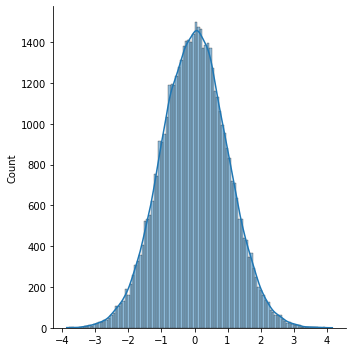

In [ ]:
sns.displot(data,kde=True)
plt.show()

In [ ]:
df.cov().round(decimals=2)

,year,rgdpo,pop,emp,avh,hc
year,385.28,2.509484e+06,82.76,29.06,-1639.22,6.11
rgdpo,2509484.30,1.145281e+12,70034895.90,39313383.89,-53875627.79,232565.30
pop,82.76,7.003490e+07,13126.24,7069.12,3190.14,-0.39
emp,29.06,3.931338e+07,7069.12,3493.72,1365.33,-0.14
avh,-1639.22,-5.387563e+07,3190.14,1365.33,74463.47,-103.35
hc,6.11,2.325653e+05,-0.39,-0.14,-103.35,0.52


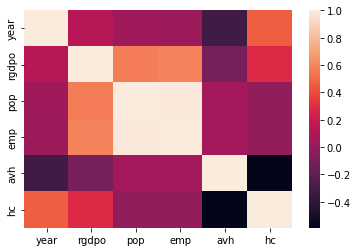

In [ ]:
sns.heatmap(df.corr().round(decimals=2))
plt.show()